In [35]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl; import json
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [37]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [38]:
# we must know the experiment index, ideally also know the temperature
# Temp = 25.0
# index_exp = 2
# Temper_i = 273.15 + Temp

In [ ]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp2 = Temp_Cell_Exp_All[2-1] 
Exp_2_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[2-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[2-1],
    2-1)
Temp_Cell_Exp3 = Temp_Cell_Exp_All[3-1] 
Exp_3_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[3-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[3-1],
    3-1)

In [94]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/SaveFig") 

In [116]:
import json
def Read_Model_BestFit(BasicPath,option,Scan_start,Scan_end,Pick,purpose_i,):
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    path_i=BasicPath+option+"/"+purpose_i+"/"+purpose+"/Mats/"+f"{Pick}-StructData.json"
    with open(path_i, 'r') as file:
        data = json.load(file)
    return data

BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/") 
option = "SEI" ;      Scan_start = 127; Scan_end = 129
purpose_i = "SEI_2_Exp23"
SEI_Exp2_GoodFit = {}
SEI_Exp2_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,Scan_start,Scan_end,127,purpose_i,)
SEI_Exp2_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,Scan_start,Scan_end,128,purpose_i,)
SEI_Exp2_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,Scan_start,Scan_end,129,purpose_i,)

In [117]:
option = "SEI_Dry" ;     
purpose_i = "SEI_Dry_4_Exp235"
SEIDry_Exp2_GoodFit = {};  SEIDry_Exp3_GoodFit = {}
SEIDry_Exp2_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,1,3,1,purpose_i,)
SEIDry_Exp2_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,1,3,2,purpose_i,)
SEIDry_Exp2_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,1,3,3,purpose_i,)
SEIDry_Exp3_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,4,6,4,purpose_i,)
SEIDry_Exp3_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,4,6,5,purpose_i,)
SEIDry_Exp3_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,4,6,6,purpose_i,)

In [118]:
option = "Full" ;     
purpose_i = "Full_3_Exp35"
Full_Exp2_GoodFit = {};  Full_Exp3_GoodFit = {}
Full_Exp2_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,1,3,1,purpose_i,)
Full_Exp2_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,1,3,2,purpose_i,)
Full_Exp2_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,1,3,3,purpose_i,)
Full_Exp3_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,4,6,4,purpose_i,)
Full_Exp3_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,4,6,5,purpose_i,)
Full_Exp3_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,4,6,6,purpose_i,)

### Read experimental C/10 voltage curve now: Time (s)	Voltage (V)
BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
cell = "A";    i=2-1; m=0
Exp_Any_AllData  = {}
Exp_Any_AllData[cell] = {} # one cell
Exp_Any_AllData[cell]["0.1C voltage"] = {}
for m in range(16):
    try:
        C_10_curve_temp = pd.read_csv(
            BasicPath+Exp_Path[i]+ "0.1C Voltage Curves/"+ f"cell {cell}/" +
            f"{Exp_head[i]} - cell {cell} - RPT{m} - 0.1C discharge data.csv", )    
    except:
        print(f"Exp-{i+1} - Cell {cell} doesn't have RPT {m}")
    else:
        C_10_curve_temp["Time (h)"] = (C_10_curve_temp["Time (s)"] - C_10_curve_temp["Time (s)"].iloc[0]) / 3600
        Exp_Any_AllData[cell]["0.1C voltage"][f"RPT{m}"] = C_10_curve_temp
        print(f"Read Exp-{i+1} - Cell {cell} RPT {m}")

#SimSave\InputData\Expt 2,2 - C-based Degradation 2\0.1C Voltage Curves\cell A

In [120]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/SaveFig")
Target = "R_230726"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [121]:
# Fig. v1 - single RPT compare
Default_Colors_Alpha = [
    [31/255, 119/255, 180/255, 0.9], # like blue
    [44/255, 160/255, 44/255,  0.9], # like green  
    [214/255, 39/255, 40/255,  0.9], # like red
    [255/255, 127/255, 14/255, 0.9],]# like orange 
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/SaveFig") 
Target = "R_230726"
m=10; ps_num = 40; index_exp=2;  T_deg = 25; dpi = 300; 
def Plot_0P1C_V_single_RPT_compare(
        SaveFig_Path,Target,index_exp,Exp_2_AllData,
        SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit,
        T_deg,ps_num,m,dpi,fs,SaveFig):
    
    target_folder = os.path.join(SaveFig_Path, Target)
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
            
    fig, axs = plt.subplots( figsize=(6,4),gridspec_kw={'top': 0.9, 'bottom': 0.15})

    color_exp     = [0, 0, 0, 0.7]; marker_exp     = "v";
    count = 0
    for cell in Temp_Cell_Exp_All[index_exp-1][str(T_deg)]:
        # plot less points
        x_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
        y_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
        step = len(x_data) // int(ps_num) 
        x_data_sliced = x_data[::step] + [x_data[-1]]
        y_data_sliced = y_data[::step] + [y_data[-1]]
        if count == 0:
            str_label = "Exp"
        else:
            str_label = None
        axs.plot(
            x_data_sliced,y_data_sliced, color=color_exp,
            marker=marker_exp, label=str_label)
        count += 1
    axs.plot(
        SEI_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEI_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],  
        '-', color = Default_Colors_Alpha[0],  label="SEI only") # SEIDry_Exp2_GoodFit["10"]
    axs.plot(
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = Default_Colors_Alpha[1], label="SEI + Dry out")
    axs.plot(
        Full_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        Full_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = Default_Colors_Alpha[2], label="5 coupled")
    axs.set_xlabel(r"Time [h]") 
    axs.set_ylabel("Voltage [V]")
    labels = axs.get_xticklabels() + axs.get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs.tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs.legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    plt.subplots_adjust(top=0.4) 
    fig.suptitle( f"Exp {index_exp}-{T_deg}degC-RPT {m}", fontsize=fs)
    if SaveFig == True:
        plt.savefig(
            target_folder + f"/Exp {index_exp}-{T_deg}degC-RPT {m}.png", dpi=dpi)
        plt.close() 
    return

for m in [10,11]:
    for T_deg in [10,25,40]:
        Plot_0P1C_V_single_RPT_compare(
            SaveFig_Path,Target,index_exp,Exp_2_AllData,
            SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit,
            T_deg,ps_num,m,dpi,fs,SaveFig=True)

In [138]:
# plot all RPT voltage 
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)
cm_gray = mpl.cm.get_cmap("gray", 12);      cm_cool =   mpl.cm.get_cmap("cool", 12); 
T_deg = 40
fig, axs = plt.subplots(3,1, figsize=(8,12),gridspec_kw={'top': 0.9, 'bottom': 0.15})
color_exp     = [0, 0, 0, 0.7]; marker_exp     = "v";
for m in range(12):
    count = 0
    #for cell in Temp_Cell_Exp_All[index_exp-1][str(T_deg)]:
    cell = Temp_Cell_Exp_All[index_exp-1][str(T_deg)][0]
    # plot less points
    x_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
    y_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
    step = len(x_data) // int(ps_num) 
    x_data_sliced = x_data[::step] + [x_data[-1]]
    y_data_sliced = y_data[::step] + [y_data[-1]]
    for n in range(3):
        axs[n].plot(
            x_data_sliced,y_data_sliced, color=cm_gray(m),
            marker=marker_exp, )
    count += 1
for m in range(12):
    axs[0].plot(
        SEI_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEI_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],  
        '-', color = cm_cool(m),  ) # SEIDry_Exp2_GoodFit["10"]
    axs[1].plot(
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = cm_cool(m))
    axs[2].plot(
        Full_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        Full_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = cm_cool(m))
axs[2].set_xlabel(r"Time [h]") 
axs[0].set_ylabel("SEI only - V [V]")
axs[1].set_ylabel("SEI+Dry out - V [V]")
axs[2].set_ylabel("5 coupled - V [V]")
for n in range(3):
    axs[n].set_xlim(8.5,9.75)
    axs[n].set_ylim(2.48,3.5)
    
    labels = axs[n].get_xticklabels() + axs[n].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[n].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    #axs.legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
#plt.subplots_adjust(top=0.4) 
# fig.suptitle( f"Exp {index_exp}-{T_deg}degC-RPT {m}", fontsize=fs)
plt.savefig(
    target_folder + f"/Exp {index_exp}-{T_deg}degC-all RPTs - zoom in.png", dpi=dpi)
plt.close()

/tmp/ipykernel_16101/1214793914.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_gray = mpl.cm.get_cmap("gray", 12);      cm_cool =   mpl.cm.get_cmap("cool", 12);


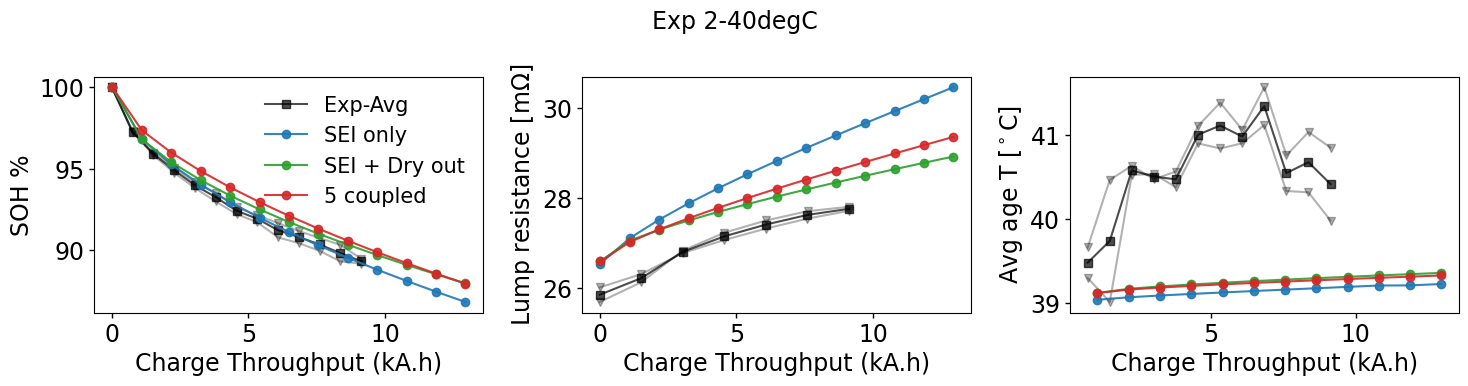

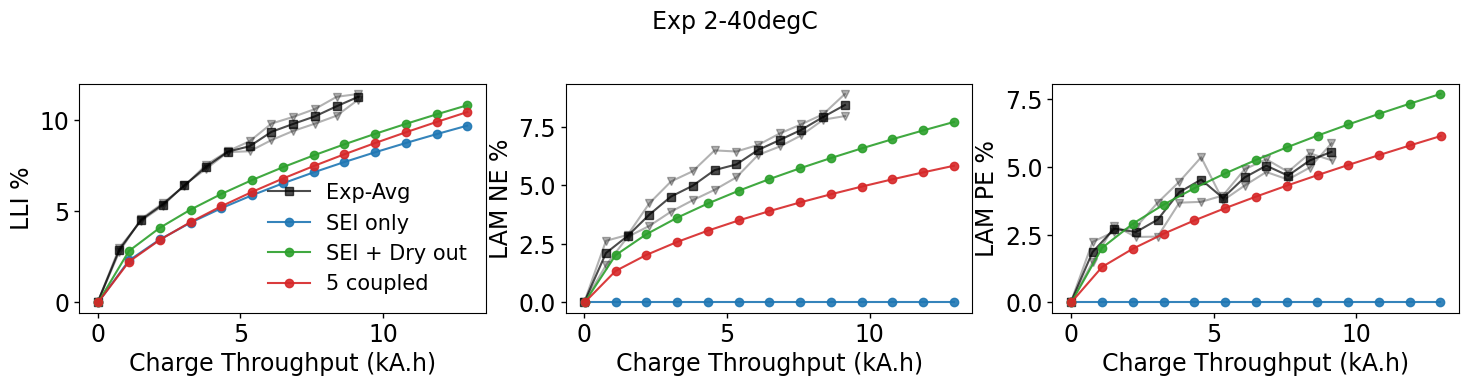

In [153]:
# now compare SOH, resistance, and T rise
# Plot Charge Throughput (A.h) vs SOH
index_exp = 2; T_deg = 10; Exp_Any_AllData = Exp_2_AllData
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Cases = [SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit]; Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
# [0,0] --> [0]; [1,1] --> [1]; [1,2] --> [2]
# [0,1] --> [0]; [0,2] --> [1]; [1,0] --> [2]
def Compare_Summary(Temp_Cell_Exp,T_deg):
    # fig. 1
    fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[1].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
        axs[2].plot(
            chThr_temp[1:],
            np.array(df["Age set average temperature (degC)"][1:]).astype(float),
            color=color_exp,marker=marker_exp,)
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[2].plot(
        X_1_st[1:],Y_6_st_avg[1:],
        color=color_exp_Avg,marker=marker_exp_Avg,)
    # Modelling:
    for k,case in enumerate(Cases):
        axs[0].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
        axs[1].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)]["Res_0p5C_50SOC"]),     '-o', 
            color = Default_Colors_Alpha[k], ) 
        axs[2].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"][1:], 
            np.array(case[str(T_deg)]["avg_Age_T"][1:]),     '-o',
            color = Default_Colors_Alpha[k],  ) 

    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    for k in range(3):
        axs[k].set_xlabel("Charge Throughput (kA.h)")
        labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    fig.suptitle( f"Exp {index_exp}-{T_deg}degC", fontsize=fs)
    #axs[n,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    plt.savefig(
        target_folder + f"/Exp {index_exp}-{T_deg}degC-SOH + R + T.png", dpi=dpi)
    # fig. 2 
    fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}"  
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
    # update 230312- plot resistance here
    # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
    axs[0].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[1].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[2].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    # Experiment:
    for k,case in enumerate(Cases):
        axs[0].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]["CDend LLI [%]"],'-o',
            color = Default_Colors_Alpha[k], label=Str_cases[k])
        axs[1].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            case[str(T_deg)]["CDend LAM_ne [%]"],     '-o',
            color = Default_Colors_Alpha[k], ) 
        axs[2].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            case[str(T_deg)]["CDend LAM_pe [%]"],     '-o',
            color = Default_Colors_Alpha[k],  ) 
    
    axs[0].set_ylabel("LLI %")
    axs[1].set_ylabel("LAM NE %")
    axs[2].set_ylabel("LAM PE %")
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    for k in range(3):
        axs[k].set_xlabel("Charge Throughput (kA.h)")
        labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    fig.suptitle( f"Exp {index_exp}-{T_deg}degC", fontsize=fs)
    #axs[n,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    plt.savefig(
        target_folder + f"/Exp {index_exp}-{T_deg}degC-DMA.png", dpi=dpi)
    #axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    #print(index_exp)
    
    return 

Compare_Summary(Temp_Cell_Exp,40)

In [ ]:
# most exciting part, compare DMA